In [1]:
import sys  
sys.path.insert(1, '../')

from src.models.densenet_gusa import DenseNetGuSA
from utils.loader import Loader
from utils.transform import transform
from src.visualization.visualize_attention import visualize_attention
# import some libraries
import torch
import math
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
model_3=DenseNetGuSA(num_classes=4,backbone_name='densenet169')
model_3.load_state_dict(torch.load('../weights/model_densenet_3.pth',map_location='cpu'))

<All keys matched successfully>

In [3]:
model_5=DenseNetGuSA(num_classes=4,backbone_name='densenet169')
model_5.load_state_dict(torch.load('../weights/model_densenet_5.pth',map_location='cpu'))

<All keys matched successfully>

In [4]:
model_8=DenseNetGuSA(num_classes=4,backbone_name='densenet169')
model_8.load_state_dict(torch.load('../weights/model_densenet_8.pth',map_location='cpu'))

<All keys matched successfully>

In [5]:
test_df=pd.read_csv('../data/ignore/test.tsv')

In [77]:
classes_df=pd.read_csv('../classes.tsv')
classes=classes_df.sort_values(by=['class_nr'])['class'].to_list()
for i,row in test_df.iloc[630:,:].iterrows():
    img_path='../data/ignore/image/'+row['image']
    img=Image.open(img_path)
    mask_path='../data/ignore/image_mask/'+row['mask']
    mask=Image.open(mask_path)
    ground_truth=row['class']
    img_transformed=transform(img,img_size=(img.size[0]//4,img.size[1]//4),patch_size=8).unsqueeze(0)
    with torch.no_grad():
        model_3.eval()
        output_3,roi_3=model_3(img_transformed)
        model_5.eval()
        output_5,roi_5=model_5(img_transformed)
        model_8.eval()
        output_8,roi_8=model_8(img_transformed)
    class_3= classes[output_3.argmax()]
    class_5= classes[output_5.argmax()]
    class_8= classes[output_8.argmax()]  
    if (class_3 != class_5) and (class_3!=class_8) and (class_3==ground_truth):
        print('only 3 is correct')
        print(i)
        break
    if (class_3 != class_5) and (class_3==ground_truth):
        print('3 and maybe 8 are correct')
        print(i)
        break

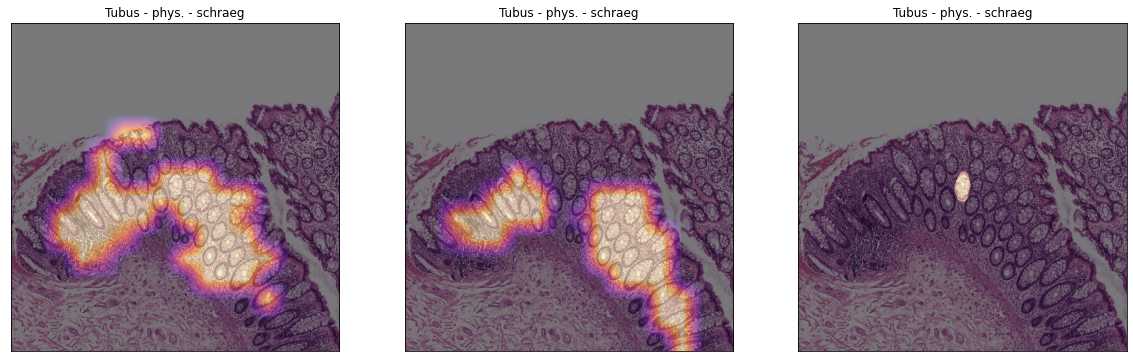

In [78]:
visualize_attention(figsize=(20,15),image=img,mask=mask,rois=[roi_3,roi_5],classes=[class_3,class_5],truth=ground_truth, show_original=True)